In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

bands = pd.read_csv('data/ma_bands_data.csv', index_col=0).sort_values('date').reset_index(drop=True)

In [2]:
bands['theme'] = bands['theme'].fillna('')

In [ ]:
bands

# Vectorization

In [ ]:
bands[bands['genre'].str.lower().str.contains('eastern')].head()

In [ ]:
bands[bands['theme'].str.lower().str.contains('early').fillna(False)].head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(binary=True, token_pattern="middle eastern|[0-9a-z'\-]+", min_df=10,
                             stop_words=['metal', 'rock', "'n'", 'roll', 'early', 'mid', 'later',
                                         'and', 'elements', 'influences', 'various', 'with'])
genre_mat = vectorizer.fit_transform(bands['genre'])
genre_names = vectorizer.get_feature_names_out()
print(genre_names)

In [ ]:
vectorizer = CountVectorizer(binary=True, token_pattern="[0-9a-z][0-9a-z'\-/\s]*[0-9a-z]", min_df=10,
                             stop_words=['early', 'mid', 'later'])
theme_mat = vectorizer.fit_transform(bands['theme'])
theme_names = vectorizer.get_feature_names_out()
print(theme_names.shape)

# 1. By Genre

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

x = range(50, 550, 50)
y = list()

for n in x:
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(genre_mat)
    #print('fit', n, end='\r')
    y.append(silhouette_score(genre_mat, kmeans.labels_, sample_size=1000, random_state=0))
    #print('score', n, end='\r')
    
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.plot(x, y);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=300, random_state=0)
kmeans.fit(genre_mat)
kmeans.labels_

In [ ]:
groups = bands.groupby(kmeans.labels_)

In [ ]:
groups.size()

In [ ]:
groups['name'].apply(lambda x: x.iloc[: 5].reset_index(drop=True)).unstack()

In [ ]:
top_pos = np.argsort(kmeans.cluster_centers_)[:, -1 : -6 : -1]
genre_names[top_pos]

In [ ]:
top = np.sort(kmeans.cluster_centers_)[:, -1 : -6 : -1]
np.round(top, 2)

In [ ]:
from scipy.sparse import csr_matrix

selector = csr_matrix((np.ones(genre_mat.shape[0]), (kmeans.labels_, np.arange(genre_mat.shape[0]))),
                      (kmeans.cluster_centers_.shape[0], genre_mat.shape[0]))
theme_by_genre = selector / selector.sum(axis=1) * theme_mat

In [ ]:
top_pos = np.argsort(theme_by_genre)[:, -1 : -6 : -1]
theme_names[top_pos]

In [ ]:
top = np.sort(theme_by_genre)[:, -1 : -6 : -1]
np.round(top, 2)

# 2. By Theme

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

x = range(100, 2000, 100)
y = list()

for n in x:
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(theme_mat)
    print('fit', n, end='\r')
    y.append(silhouette_score(theme_mat, kmeans.labels_, sample_size=1000, random_state=0))
    print('score', n, end='\r')
    
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.plot(x, y);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=700, random_state=0)
kmeans.fit(theme_mat)
kmeans.labels_

In [ ]:
groups = bands.groupby(kmeans.labels_)

In [ ]:
groups.size()

In [ ]:
groups['name'].apply(lambda x: x.iloc[: 5].reset_index(drop=True)).unstack()

In [ ]:
top_pos = np.argsort(kmeans.cluster_centers_)[:, -1 : -6 : -1]
theme_names[top_pos]

In [ ]:
top = np.sort(kmeans.cluster_centers_)[:, -1 : -6 : -1]
np.round(top, 2)

In [ ]:
from scipy.sparse import csr_matrix

selector = csr_matrix((np.ones(theme_mat.shape[0]), (kmeans.labels_, np.arange(theme_mat.shape[0]))),
                      (kmeans.cluster_centers_.shape[0], theme_mat.shape[0]))
genre_by_theme = selector / selector.sum(axis=1) * genre_mat

In [ ]:
top_pos = np.argsort(genre_by_theme)[:, -1 : -6 : -1]
genre_names[top_pos]

In [ ]:
top = np.sort(genre_by_theme)[:, -1 : -6 : -1]
np.round(top, 2)

In [3]:
import unicodedata

bands_st = bands.copy()
bands_st['city'] = bands['location'].str.findall('^\s*([^,]+)\s*').str[0]
bands_st = bands_st.dropna(subset={'date', 'country', 'city'})
bands_st['city'] = bands_st['city'].apply(lambda x:
                                          unicodedata
                                          .normalize('NFKD', x)
                                          .encode('ascii', 'ignore')
                                          .decode('ascii')
                                          .lower())
bands_st

,name,url,genre,theme,label,country,location,status,date,years,city
0,Olympic,https://www.metal-archives.com/bands/Olympic/3...,Pop Rock; Heavy Metal/Hard Rock (mid),,NaN,Czechia,Prague,Active,1962.0,1962-present,prague
1,Orient,https://www.metal-archives.com/bands/Orient/51156,Hard Rock (early); Heavy Metal (later),"['Sex', ' Evil']",Unsigned/independent,Czechia,Prague,Active,1964.0,"1964-1990,1998-present",prague
2,Scorpions,https://www.metal-archives.com/bands/Scorpions...,Heavy Metal/Hard Rock,"['Life', ' Society', ' Love', ' Sex', ' Inner ...",NaN,Germany,"Hannover, Lower Saxony",Active,1964.0,1964-present,hannover
3,Faithful Breath,https://www.metal-archives.com/bands/Faithful_...,Progressive Rock (early); Heavy Metal/Hard Roc...,"['Adventure', ' Fantasy', ' Women']",NaN,Germany,"Witten, North Rhine-Westphalia",Changed name,1967.0,"1966-1967 (as),1967-1986,1986-1993 (as)",witten
4,Limelight,https://www.metal-archives.com/bands/Limelight...,NWOBHM/Heavy Metal/Hard Rock,"['Life', ' Feelings', ' Love', ' Thoughts']",NaN,United Kingdom,"Mansfield, Nottinghamshire, England",Split-up,1967.0,"1967-?,1997",mansfield
...,...,...,...,...,...,...,...,...,...,...,...
128309,Manawydan,https://www.metal-archives.com/bands/Manawydan...,Black Metal,['History / Indigenous history'],Unsigned/independent,United States,"Columbus, Ohio",Active,2022.0,2022-present,columbus
128310,Черновство,https://www.metal-archives.com/bands/%D0%A7%D0...,"Black Metal, Ambient",,Unsigned/independent,Russia,"Tver, Tver Oblast",Active,2022.0,"?-2022 (as),2022-present",tver
128312,Cineres,https://www.metal-archives.com/bands/Cineres/3...,Melodic Black Metal,"['Philosophy', ' Abstract themes']",Unsigned/independent,Slovakia,"Nitra, Nitra",Active,2022.0,2022-present,nitra
128313,Dark Triumph,https://www.metal-archives.com/bands/Dark_Triu...,Symphonic Black Metal,"['Agony', ' Darkness', ' Death']",Unsigned/independent,Brazil,"Belo Horizonte, Minas Gerais",Active,2022.0,2022-present,belo horizonte


World Cities Database: https://www.kaggle.com/datasets/max-mind/world-cities-database  
ISO Country Codes - Global: https://www.kaggle.com/datasets/andradaolteanu/iso-country-codes-global

In [4]:
cities = pd.read_csv('data/worldcitiespop.csv', dtype={'Region': 'str'})
cities = cities.drop(['AccentCity', 'Region', 'Population'], axis=1)
cities = cities.rename({'Country': 'code', 'City': 'city', 'Latitude': 'lat', 'Longitude': 'lon'}, axis = 1)
cities['code'] = cities['code'].str.upper()
cities

,code,city,lat,lon
0,AD,aixas,42.483333,1.466667
1,AD,aixirivali,42.466667,1.500000
2,AD,aixirivall,42.466667,1.500000
3,AD,aixirvall,42.466667,1.500000
4,AD,aixovall,42.466667,1.483333
...,...,...,...,...
3173953,ZW,zimre park,-17.866111,31.213611
3173954,ZW,ziyakamanas,-18.216667,27.950000
3173955,ZW,zizalisari,-17.758889,31.010556
3173956,ZW,zuzumba,-20.033333,27.933333


In [5]:
codes = pd.read_csv('data/wikipedia-iso-country-codes.csv')
codes = codes.drop(['Alpha-3 code', 'Numeric code', 'ISO 3166-2'], axis=1)
codes = codes.rename({'English short name lower case': 'country', 'Alpha-2 code': 'code'}, axis=1)
codes

,country,code
0,Zimbabwe,ZW
1,Zambia,ZM
2,Yemen,YE
3,Western Sahara,EH
4,Wallis and Futuna,WF
...,...,...
241,American Samoa,AS
242,Algeria,DZ
243,Albania,AL
244,Afghanistan,AF


In [6]:
cities = pd.merge(cities, codes, on='code').drop('code', axis=1)
cities

,city,lat,lon,country
0,aixas,42.483333,1.466667,Andorra
1,aixirivali,42.466667,1.500000,Andorra
2,aixirivall,42.466667,1.500000,Andorra
3,aixirvall,42.466667,1.500000,Andorra
4,aixovall,42.466667,1.483333,Andorra
...,...,...,...,...
3148671,zimre park,-17.866111,31.213611,Zimbabwe
3148672,ziyakamanas,-18.216667,27.950000,Zimbabwe
3148673,zizalisari,-17.758889,31.010556,Zimbabwe
3148674,zuzumba,-20.033333,27.933333,Zimbabwe


In [7]:
cities = cities.loc[cities.drop(['lat', 'lon'], axis=1).drop_duplicates().index].reset_index(drop='True')
cities

,city,lat,lon,country
0,aixas,42.483333,1.466667,Andorra
1,aixirivali,42.466667,1.500000,Andorra
2,aixirivall,42.466667,1.500000,Andorra
3,aixirvall,42.466667,1.500000,Andorra
4,aixovall,42.466667,1.483333,Andorra
...,...,...,...,...
2589178,zimre park,-17.866111,31.213611,Zimbabwe
2589179,ziyakamanas,-18.216667,27.950000,Zimbabwe
2589180,zizalisari,-17.758889,31.010556,Zimbabwe
2589181,zuzumba,-20.033333,27.933333,Zimbabwe


In [8]:
bands_st = pd.merge(bands_st, cities, on=['country', 'city'])
bands_st

,name,url,genre,theme,label,country,location,status,date,years,city,lat,lon
0,Scorpions,https://www.metal-archives.com/bands/Scorpions...,Heavy Metal/Hard Rock,"['Life', ' Society', ' Love', ' Sex', ' Inner ...",NaN,Germany,"Hannover, Lower Saxony",Active,1964.0,1964-present,hannover,53.183333,8.516667
1,Faithful Breath,https://www.metal-archives.com/bands/Faithful_...,Progressive Rock (early); Heavy Metal/Hard Roc...,"['Adventure', ' Fantasy', ' Women']",NaN,Germany,"Witten, North Rhine-Westphalia",Changed name,1967.0,"1966-1967 (as),1967-1986,1986-1993 (as)",witten,51.433333,7.333333
2,Risk,https://www.metal-archives.com/bands/Risk/911,Thrash/Speed Metal,"['Society', ' Humour', ' Violence', ' Corrupti...",NaN,Germany,"Witten, North Rhine-Westphalia",Split-up,1986.0,"1967-1986 (as),1986-1993",witten,51.433333,7.333333
3,MP,https://www.metal-archives.com/bands/MP/18081,Heavy/Speed Metal,"['Metal', ' Rebellion']",NaN,Germany,"Witten, North Rhine-Westphalia",Active,1986.0,1986-present,witten,51.433333,7.333333
4,Magic Power,https://www.metal-archives.com/bands/Magic_Pow...,Heavy Metal,,Unsigned/independent,Germany,"Witten, North Rhine-Westphalia",Split-up,1988.0,1988-?,witten,51.433333,7.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107175,Athoryns,https://www.metal-archives.com/bands/Athoryns/...,Death Metal,"['Satan', ' Vampires']",NaN,Brazil,"São Sepé, Rio Grande Do Sul",Active,2022.0,"2021-2022 (as),2022 (as),2022-present",sao sepe,-30.166667,-53.566667
107176,Morgul Vale,https://www.metal-archives.com/bands/Morgul_Va...,Atmospheric Black Metal,['J.R.R. Tolkien'],Unsigned/independent,United States,"Sellersburg, Indiana",Active,2022.0,2022-present,sellersburg,38.398056,-85.755000
107177,Batlord,https://www.metal-archives.com/bands/Batlord/3...,Black Metal,['Suffering'],Unsigned/independent,United States,"Greenwood Lake, New York",Active,2022.0,2022-present,greenwood lake,41.222500,-74.294722
107178,Captionem Dimensio,https://www.metal-archives.com/bands/Captionem...,Black Metal,"['Darkness', ' Trascendence', ' Elements', ' A...",Unsigned/independent,Colombia,"Tenjo, Cundinamarca",Active,2022.0,2022-present,tenjo,3.523333,-76.169722


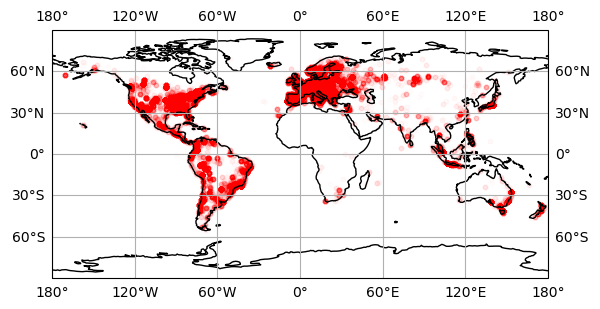

In [114]:
import cartopy.crs as ccrs
import cartopy.feature as cf
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)

ax.scatter(bands_st.loc[:, 'lon'], bands_st.loc[:, 'lat'], marker='o', s=10, color="r", alpha=0.01,
           transform=proj)
ax.coastlines()
ax.set_extent([-180, 180, -90, 90])
ax.gridlines(draw_labels=True)